# Büyük Veride Makine Öğrenmesi

In [1]:
import findspark
findspark.init("/Users/necmiyesoyla/spark/spark-3.3.2-bin-hadoop3")

import pyspark
from pyspark.conf import SparkConf
from pyspark import SparkContext
from pyspark.sql import SparkSession

spark=SparkSession.builder\
    .master("local")\
    .appName("ml_spark")\
    .getOrCreate()

sc=spark.sparkContext
sc

23/03/04 03:18:41 WARN Utils: Your hostname, Necmiyes-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.1.40 instead (on interface en0)
23/03/04 03:18:41 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/04 03:18:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


<SparkContext master=local appName=ml_spark>

In [2]:
s_df=spark.read.csv("churn.csv", header=True, inferSchema=True, sep=",")
s_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [3]:
s_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [4]:
s_df.show(10)
#hocam elimizde müşterilerle ilgili bir veri seti var. müşterini bizi terk edip etmeyeceğini bulmaya çalışıyoruz

23/03/04 03:18:53 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , Names, Age, Total_Purchase, Account_Manager, Years, Num_Sites, Churn
 Schema: _c0, Names, Age, Total_Purchase, Account_Manager, Years, Num_Sites, Churn
Expected: _c0 but found: 
CSV file: file:///Users/necmiyesoyla/Desktop/Machine_Learing/BigData/churn.csv
+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|


In [5]:
#değişken isimlerini belirli bir standartta tuttmak mantıklı olur. hadi bizde tüm değişken isimlerini küçük harli yapalım
s_df=s_df.toDF(*[itr.lower() for itr in s_df.columns])
s_df.show(5)

#bu yöntem saprk df için geçerli aynı işşşlemi pandas df'de yapmak istersen
#df.columns(str.lower,df.columns) evet daha kolay daat frame işlemlerinin pandas daha gelişmiş olduğunu söylemiştik :)) 

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [6]:
#yine data setimizz üzerinden daah rahat işlme yapabilmemiz değişiklik yapmaya aslında kişiselleştirmeye devam ediyoruz.
#_c0 ismi çok saçma aslında index 'i tutuyır yekten index diyelim :)

s_df=s_df.withColumnRenamed("_c0","index")
s_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 3 rows



In [7]:
print("Gözlem sayısı:",s_df.count())#gözlem sayısı
print("değişken sayısı:",len(s_df.columns))#değişken sayısı
print("ve değişkn isimleri:")
s_df.columns#değişkneler

Gözlem sayısı: 900
değişken sayısı: 8
ve değişkn isimleri:


['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [8]:
#gerçek bi rproje üstünde çalışır gibi ileliyoruz
#bu ilemlerden sonra dat sette isimsiz gözlme varmı yani tekrarlı gözlem var mı diye kontrol ederiz

s_df.distinct().count()
#ops 900 mü?

900

In [9]:
print("year:",s_df.select("years").distinct().count())
print("age:",s_df.select("age").distinct().count())
print("num_sites:",s_df.select("num_sites").distinct().count())
print("total_purchase:",s_df.select("total_purchase").distinct().count())


#olmadı yeaars değişkeninden kaynaklı olabilr mi demiştim
#birde names'e bakalım belki aynı isimli müşteriler vardır

year: 418
age: 36
num_sites: 12
total_purchase: 900


In [10]:
print(s_df.select("names").distinct().count())
#hm isim değişkenşnden kaynaj-klıumış

899


In [11]:
#peki aklımıza bir kurt düştü bunlr gerçekten isim benzerliği olna müşteriler mi? yoksa tekrar eden gözlemler mi?
#bunu için isime göre gruplayalım
#isimlere göre grupluyoruz sonra sıralıyoruz 
s_df.groupBy("names").count().sort("count", ascending=False).show(5)

+----------------+-----+
|           names|count|
+----------------+-----+
|   Jennifer Wood|    2|
|    Patrick Bell|    1|
|   Chelsea Marsh|    1|
|Patrick Robinson|    1|
|     John Barber|    1|
+----------------+-----+
only showing top 5 rows



In [12]:
s_df.filter(s_df.names=="Jennifer Wood").show()
#evet sorun yok isim benzerliği

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [13]:
s_df.groupBy("age").count().sort("count", ascending=False).show(5)
#aynı yaşt insanalrın oması çokt aönemli değil sorun yok yani

+----+-----+
| age|count|
+----+-----+
|41.0|   69|
|43.0|   59|
|40.0|   58|
|45.0|   56|
|44.0|   53|
+----+-----+
only showing top 5 rows



In [14]:
#peki farz edelim ki spesifik olarak belli bir değişknedeki tekrarlayanları silmek istiyoruz hadi bakalım 

s_df.select("names").dropDuplicates()

s_df.select("names").dropDuplicates().groupby("names").count().sort("count",ascending=False).show(3)

#ilk satırda aslında silme işlemini yaptık ama kayıt etmediğimiz için gerçekten 
#silip silmediğ,n, görmek için aymı kodu tekrar yasıp devamona da görmemizi sağlayac kodu ekledik 

+----------------+-----+
|           names|count|
+----------------+-----+
|    Patrick Bell|    1|
|Patrick Robinson|    1|
|   Chelsea Marsh|    1|
+----------------+-----+
only showing top 3 rows



In [15]:
s_df.select("age").dropDuplicates()

s_df.select("age").dropDuplicates().groupby("age").count().sort("count",ascending=False).show(5)

s_df.select("age").dropDuplicates().count()#sadece 36 gözlem kalmış :))

+----+-----+
| age|count|
+----+-----+
|49.0|    1|
|29.0|    1|
|47.0|    1|
|42.0|    1|
|44.0|    1|
+----+-----+
only showing top 5 rows



36

In [16]:
#Codun anlam ve önemi Hocam muhakkak duplicate gözlme avrnı diye kontrol edelim

In [17]:
#peki birde belirli bir indise veya belirli indisden belirli bir değişkene ulaşma gereksiniminde ne yaparoz ona bakalım

In [18]:
s_df.where(s_df.index==100).show()#22.indexteki kişiye eriştik

+-----+------------+----+--------------+---------------+-----+---------+-----+
|index|       names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+------------+----+--------------+---------------+-----+---------+-----+
|  100|Chelsea Ward|43.0|      12104.25|              0| 5.86|      7.0|    1|
+-----+------------+----+--------------+---------------+-----+---------+-----+



In [19]:
s_df.where(s_df.index==100).select("names").show()
#sadece ismine eriştik

+------------+
|       names|
+------------+
|Chelsea Ward|
+------------+



In [20]:
#hocam seçtiğimiz veriyi alıp işlenebilr hala getirdik
#bu normalde zor bir işlem. Spark data farmeden veriyi kandi tipind eişlnebilir halde almak. bunu bize sağlayan metod görüldiği collect() Teşkkkürler collect()👏🏻
#yınıdaki [0] index işareti herzaman 0 oluyor am neden bende bilmiyorum
x=s_df.where(s_df.index==100).collect()[0]["age"]

In [21]:
type(x)

float

# Veri Analizi

In [22]:
# veri setini nasıl tanır nasıl yorumlarız?

In [23]:
#öncelikle istatsitiklerine bakalım

s_df.describe().show()

#oyy fehimee bu ne çirkinlik

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [24]:
#istatistik kısmını daha güzel görebilmek için pandas'tan faydalanıyoruz

s_df.select("age","total_purchase","account_manager","years","num_sites","churn").describe().toPandas().transpose()

#çiçek gibi oldu. Hadi yorumlayalım

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [25]:
#churn ve account_manager var yok şeklinde(kategorik, sadece 0 1 değerlerinden oluşan) bir değişken olduğunu anlıyoruz
#ancak chur'nün ortalamaası 0'a yakın olduğu içn sınıf içinde düzensiz bir dağilim olduğunu söyleyebiliriz. 0lar ciddi orandan ağırlıkta yani :)) denge yok
#churn şirketimizden müşterinin ayrılması

In [26]:
print(s_df.filter(s_df.age<35).count())
print(s_df.filter(s_df.age<30).count())


100
19


In [27]:
print("1:",s_df.filter(s_df.churn==1).count())
print("0:",s_df.filter(s_df.churn==0).count())

1: 150
0: 750


In [28]:
#yukarıdaki işlemler belirli değişknelri filtreleyerek ulaşmak içn hemen bir üzttekşnin yapmanın bir kolya yalo daha var gruplamak
#sadce iki değer aldığı için fşltrelem ve gruplamakta aynı sonucu alırız

s_df.groupBy("churn").count().show()

+-----+-----+
|churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [29]:
#ilişkiye bakalım
s_df.groupBy("churn").agg({"age":"mean"}).show()

+-----+-----------------+
|churn|         avg(age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



In [30]:
#hadi çaprazlama  göreselleştirme işlemleriyle değişkmnelrşn birbirlei arasındaki ilişkiye bakalım
#evet aslında bu işlemleri ml kendisi yapar ancak gerçekten veri ile ilginiyprsak veri yi makine den dah iyi bilmliyiz ki öğretebilelim:))

In [31]:
p_df=s_df.drop("index","names").toPandas()

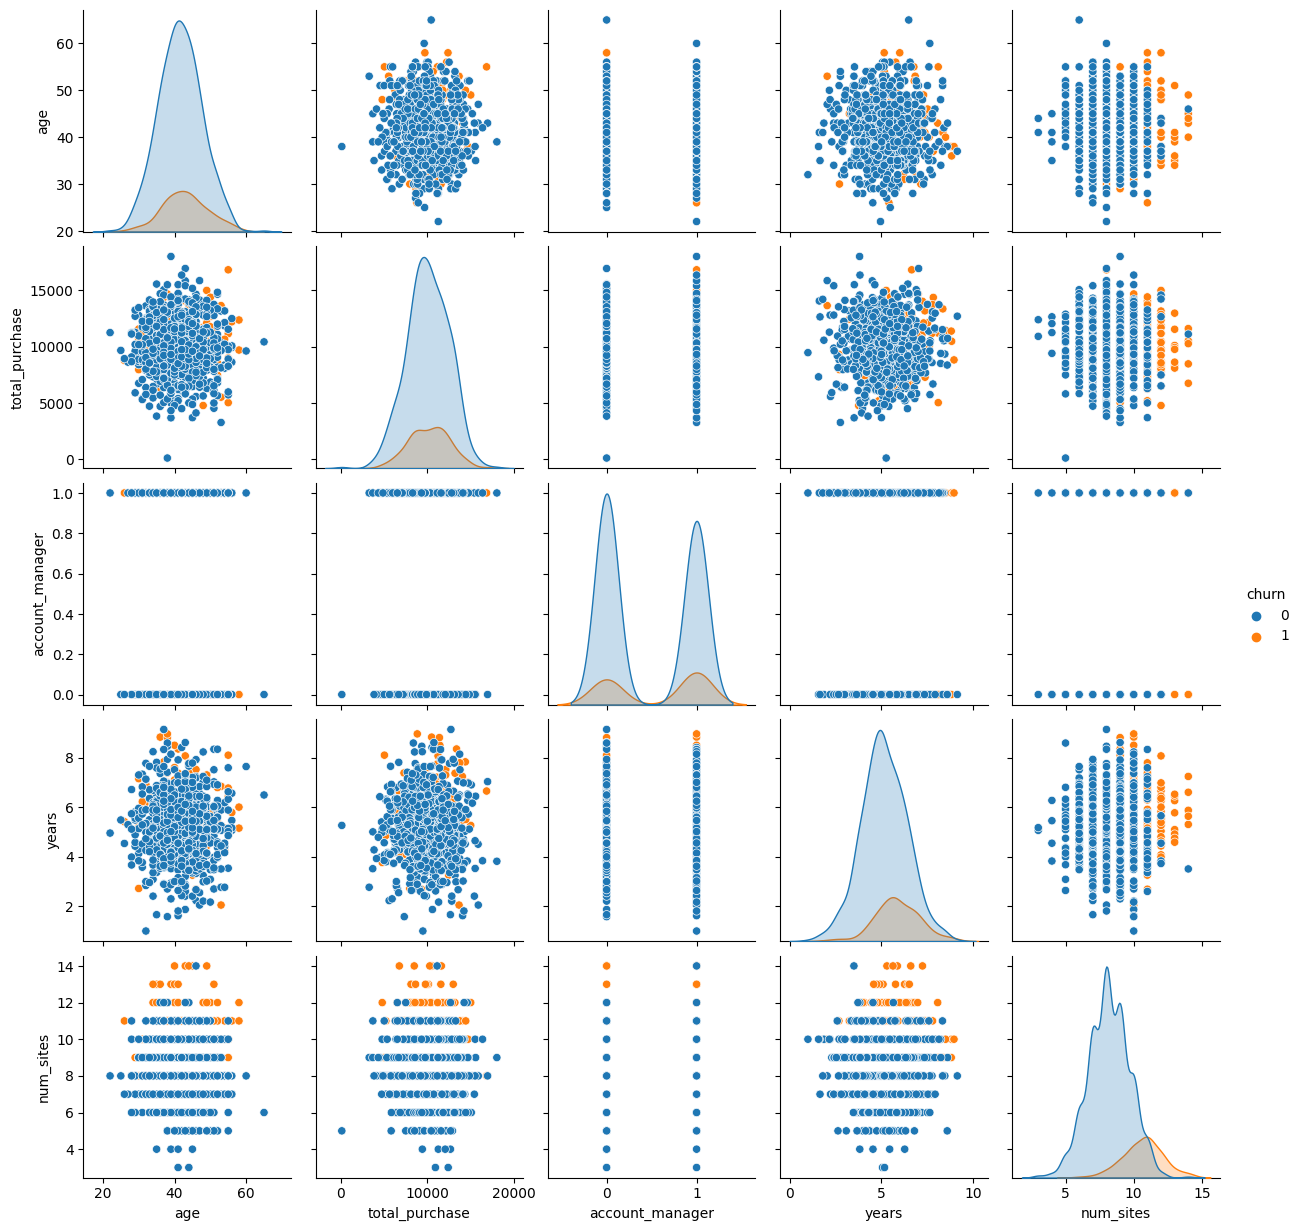

In [32]:
import seaborn as sns
sns.pairplot(p_df,hue="churn")

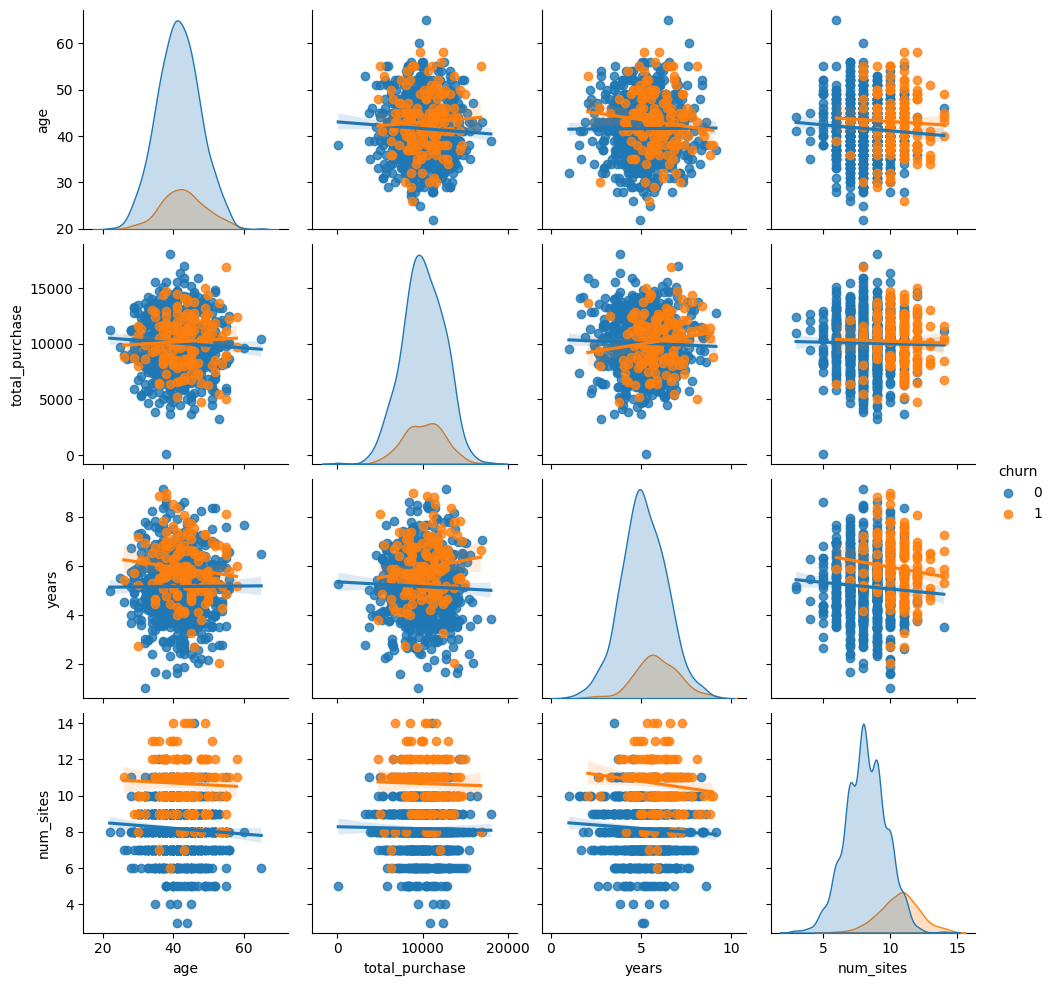

In [33]:
sns.pairplot(p_df,
            hue="churn",
            vars=["age","total_purchase","years","num_sites"],
            kind="reg");

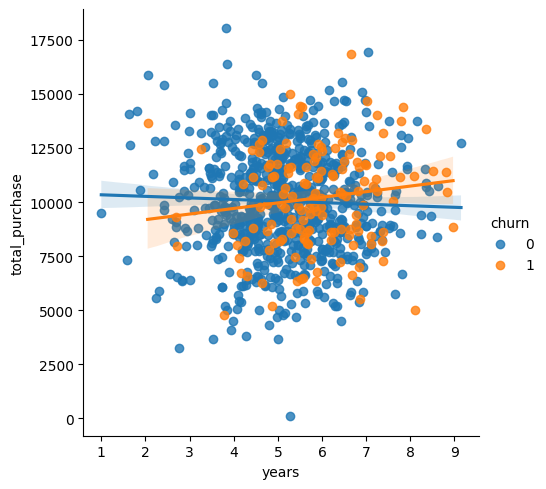

In [34]:
#buradaki amacımımz koralasyondan ziyade etki düzeti 
#mesala yıl ve satın alma arasında: yılın artmas satın almayı churn olacak müşterilerde arttırırken, churn olmayacak müşterilerde azaltıyor :)) çok ilginç

sns.lmplot(data=p_df,y="total_purchase",x="years",hue="churn")

# Veri Ön İşleme

## Bağımlı Değişkenin ayarlanması

In [35]:
s_df=s_df.dropna()

In [36]:
s_df=s_df.withColumn("age_squared",s_df.age**2)
s_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_squared|
+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|     1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|     1681.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|     1444.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+
only showing top 3 rows



In [37]:
from pyspark.ml.feature import StringIndexer


In [38]:
SI=StringIndexer(inputCol="churn",outputCol="label")#bu big dat ml de yazılı olmayan bir kuraldır bağımlı değişken labal bağımsız değişkne feature olarak isimşendirilir

In [39]:
?SI
#eğer label olması için verilen değişkne stirngse ki genelde öyle olur bunu numeriğe çevirir
#ve çok gözlenen kısmı 0 olarak etiketlemiş. müşterinin churn olmaması 0 olması gibi. ki genelde böyledir çok gözlenen kıısm 0 olarka verilir

Type:           StringIndexer
String form:    StringIndexer_f4e44391fcb5
File:           ~/spark/spark-3.3.2-bin-hadoop3/python/pyspark/ml/feature.py
Docstring:     
A label indexer that maps a string column of labels to an ML column of label indices.
If the input column is numeric, we cast it to string and index the string values.
The indices are in [0, numLabels). By default, this is ordered by label frequencies
so the most frequent label gets index 0. The ordering behavior is controlled by
setting :py:attr:`stringOrderType`. Its default value is 'frequencyDesc'.

.. versionadded:: 1.4.0

Examples
--------
>>> stringIndexer = StringIndexer(inputCol="label", outputCol="indexed",
...     stringOrderType="frequencyDesc")
>>> stringIndexer.setHandleInvalid("error")
StringIndexer...
>>> model = stringIndexer.fit(stringIndDf)
>>> model.setHandleInvalid("error")
StringIndexerModel...
>>> td = model.transform(stringIndDf)
>>> sorted(set([(i[0], i[1]) for i in td.select(td.id, td.indexed).col

In [40]:
indexed=SI.fit(s_df).transform(s_df)

In [41]:
indexed.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_squared', 'double'),
 ('label', 'double')]

In [42]:
#görüldüğü üzere label double ama biz onu şnt yapmak istiyoruz
indexed=indexed.withColumn("label",indexed["label"].cast("integer"))
indexed.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_squared', 'double'),
 ('label', 'int')]

## Bağımsız Değişkenin Ayarlanması

In [43]:
from pyspark.ml.feature import VectorAssembler
s_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'age_squared']

In [57]:
features_names=["age","total_purchase","account_manager","years","num_sites"]
VA=VectorAssembler(inputCols=features_names,outputCol="features")
va=VA.transform(indexed)

In [45]:
va.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+--------------------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_squared|            features|
+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+--------------------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|     1764.0|[42.0,11066.8,0.0...|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|     1681.0|[41.0,11916.22,0....|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|     1444.0|[38.0,12884.75,0....|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|     1764.0|[42.0,8010.76,0.0...|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|     1369.0|[37.0,9191.58,0.0...|
+-----+----------------+----+--------------+---------------+-----+------

In [62]:
final_df=va.select(["features","label"])
final_df.show(5)
#bağımsız değişkene label dedik numerik ypatık falan ama asıl olay bağımsız değişknlerde birer vektör haline geldiler

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
+--------------------+-----+
only showing top 5 rows



# Test Train Ayırımı

In [63]:
split=final_df.randomSplit([0.7,0.3])
train=split[0]
test=split[1]

# GBM

In [64]:
from pyspark.ml.classification import GBTClassifier


In [67]:
gbm=GBTClassifier(maxIter=10, featuresCol="features",labelCol="label")

In [68]:
gbm_model=gbm.fit(train)

In [70]:
pred=gbm_model.transform(test)

In [71]:
pred

DataFrame[features: vector, label: int, rawPrediction: vector, probability: vector, prediction: double]

In [76]:
x=pred.select("label","prediction")
x.filter(x.label==x.prediction).count()/x.count()
#valide edilmem,ş ilkel test hatası,

0.8489208633093526

# Tuning

In [77]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [83]:
evo=BinaryClassificationEvaluator()
params=(ParamGridBuilder()
        .addGrid(gbm.maxDepth,[2,4,6])
        .addGrid(gbm.maxBins,[20,30])
        .addGrid(gbm.maxIter,[10,20])
        .build()
)

In [84]:
cv=CrossValidator(estimator=gbm, estimatorParamMaps=params, evaluator=evo, numFolds=10)

In [85]:
cv_model=cv.fit(train)

23/03/04 03:42:28 WARN BlockManager: Asked to remove block broadcast_415_piece0, which does not exist
23/03/04 03:44:38 WARN BlockManager: Block broadcast_11083 could not be removed as it was not found on disk or in memory
23/03/04 03:44:38 WARN BlockManager: Block broadcast_11083 was not removed normally.
23/03/04 03:44:38 ERROR BlockManagerStorageEndpoint: Error in removing broadcast 11083
org.apache.spark.SparkException: Block broadcast_11083 does not exist
	at org.apache.spark.errors.SparkCoreErrors$.blockDoesNotExistError(SparkCoreErrors.scala:234)
	at org.apache.spark.storage.BlockInfoManager.blockInfo(BlockInfoManager.scala:237)
	at org.apache.spark.storage.BlockInfoManager.removeBlock(BlockInfoManager.scala:500)
	at org.apache.spark.storage.BlockManager.removeBlockInternal(BlockManager.scala:2011)
	at org.apache.spark.storage.BlockManager.removeBlock(BlockManager.scala:1977)
	at org.apache.spark.storage.BlockManager.$anonfun$removeBroadcast$3(BlockManager.scala:1963)
	at org.ap

In [86]:
pred=cv_model.transform(test)
ac=pred.select("label","prediction")
ac.filter(ac.label==ac.prediction).count()/ac.count()

0.8848920863309353

In [87]:
evo.evaluate(pred)

0.86164334729525

# Kendimizce Test :))

Bu müşteriler bizi terk eder mi?

Model kurduk test hatası falan aldık eee yani? işte bunlaarın hepsini elimize yeni veri geldiğinde tahmin edelim diye yaptık

In [90]:
import pandas as pd
names = pd.Series(["Ali Ahmetoğlu", "Berkcan Tanerbey", "Harika Gündüz","Polat Alemdar", "Ata Bakmayan Ali"])
age = pd.Series([38, 43, 34, 50, 40])
total_purchase = pd.Series([30000, 10000, 6000, 30000, 100000])
account_manager = pd.Series([1,0,0,1,1])
years = pd.Series([20, 10, 3, 8, 30])
num_sites = pd.Series([30,8,8,6,50])


new_costumers = pd.DataFrame({
    'names':names,
    'age': age,
    'total_purchase': total_purchase,
    'account_manager': account_manager ,
    'years': years,
    'num_sites': num_sites})

In [91]:
new_costumers

,names,age,total_purchase,account_manager,years,num_sites
0,Ali Ahmetoğlu,38,30000,1,20,30
1,Berkcan Tanerbey,43,10000,0,10,8
2,Harika Gündüz,34,6000,0,3,8
3,Polat Alemdar,50,30000,1,8,6
4,Ata Bakmayan Ali,40,100000,1,30,50


In [93]:
#öncelikle spar df'e dönüştürelim

new_sdf=spark.createDataFrame(new_costumers)

/Users/necmiyesoyla/spark/spark-3.3.2-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/Users/necmiyesoyla/spark/spark-3.3.2-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [94]:
type(new_sdf)#👍🏻

pyspark.sql.dataframe.DataFrame

In [96]:
new_sdf_vector=VA.transform(new_sdf)
new_sdf_vector

DataFrame[names: string, age: bigint, total_purchase: bigint, account_manager: bigint, years: bigint, num_sites: bigint, features: vector]

In [99]:
result=cv_model.transform(new_sdf_vector)#bu transform predict fonksiyonu gibi

In [101]:
result.select("names","prediction").show()
#gereki işlemi yaptık ve modelimimzn tahmininne göre ali Ahmetoğlu ve ata bakmayan ali bizi terk edecek 

+----------------+----------+
|           names|prediction|
+----------------+----------+
|   Ali Ahmetoğlu|       1.0|
|Berkcan Tanerbey|       0.0|
|   Harika Gündüz|       0.0|
|   Polat Alemdar|       0.0|
|Ata Bakmayan Ali|       1.0|
+----------------+----------+

